### Step 0 = RoadMap

### Step 1 = Library Importation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

### Step 2 = Data Generation

In [3]:
def linearRegrFunction(n, D, low_D, high_D, W, sigma_noise):
    # Create an empty matrix (fulfilled by zero) X with dimensions (n, D)
		# n = rows, D = columns, w = Coefficient
    X = np.zeros((n, D))

    # Generate random values for each feature (column) in X within specified
			# ranges
		# i for each column or feature, (0, D) -> columns or features range
    for i in range(0, D):
				# Filling each column of X with random values between low_D and high_D
				# n = the number of random numbers which are generated
				# This code generates random values for each column until the last one
        X[:, i] = np.random.uniform(low_D[i], high_D[i], size=n)
		
    print('X: {0}'.format(X))    

    # Generate Gaussian noise with mean 0 and standard deviation sigma_noise
			# and in size (n,1) array means n rows and 1 column
    gauss_noise = np.random.normal(0, sigma_noise, size=(n, 1))
    print('Gauss Noise: {0}'.format(gauss_noise))
    # Two-by-four array of samples ((2,4) two rows and 4 columns)
        # from the normal distribution with mean 3 and standard deviation 2.5:
    # >>> np.random.normal(3, 2.5, size=(2, 4))
    # array([[-4.49401501,  4.00950034, -1.81814867,  7.29718677],   # random 
    # [ 0.39924804,  4.68456316,  4.99394529,  4.84057254]])  # random

    # Create the target variable Y using a linear combination of features
				# in X and adding noise; weight vector W
    Y = np.dot(X, W) + gauss_noise
    print('Y: {0}'.format(Y))

    return X, Y

### Step 3 = Noiseless Execution

In [4]:
n = 10
D = 1
low_D, high_D = [-1], [1]
w = np.array(1.0).reshape(1, 1)
noise_std = 0.0

# Data generation
X, Y = linearRegrFunction(n, D, low_D, high_D, w, noise_std)

X: [[-0.39864058]
 [-0.10223441]
 [ 0.42475904]
 [ 0.0853785 ]
 [ 0.77199832]
 [-0.14139799]
 [-0.18460231]
 [-0.95737582]
 [-0.88382445]
 [ 0.2079548 ]]
Gauss Noise: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Y: [[-0.39864058]
 [-0.10223441]
 [ 0.42475904]
 [ 0.0853785 ]
 [ 0.77199832]
 [-0.14139799]
 [-0.18460231]
 [-0.95737582]
 [-0.88382445]
 [ 0.2079548 ]]


### Step 4 = Visualization

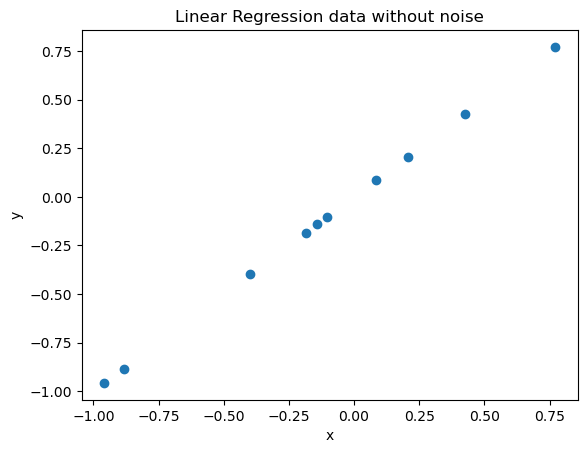

In [5]:
# Plot of the data
_, ax = plt.subplots()
ax.set_title("Linear Regression data without noise")
ax.set_xlabel("x")
ax.set_ylabel("y")
# Scatter is used to visualize the points 
ax.scatter(X, Y)

Consider the following formulas
**$(X_{tr}^\intercal X_{tr} + \lambda n I)w = X_{tr}^\intercal Y_{tr}$**

Let $A = X_{tr}^\intercal X_{tr} + \lambda n I$ and $b = X_{tr}^\intercal Y_{tr}$, we can find $w$ with the following steps:
**$Aw=b$**

Now let's solve it by codes:

In [6]:
def regularizedLSTrain(Xtr, Ytr, lam):
    n, D = Xtr.shape
    A = np.dot(Xtr.T, Xtr) + lam * n * np.identity(D)
    b = np.dot(Xtr.T * Ytr)
    np.linalg()

### Step 5 - RLS Regressor - w Calculation

In [7]:
import numpy as np
from scipy.linalg import solve_triangular

def regularizedLSTrain(Xtr, Ytr, lam):
    """
    Train RLS regression.

    Parameters:
    - Xtr: Training inputs
    - Ytr: Training outputs
    - lam: Regularization parameter

    Returns:
    - w: Weight vector
    """

    # Step 1: Build the left-hand side matrix A and the right-hand side matrix b
    n, d = Xtr.shape
		# n = rows number
		# d = columns number
    A = np.dot(Xtr.T, Xtr) + lam * n * np.identity(d)
    b = np.dot(Xtr.T, Ytr)

    # Step 2: Compute the Cholesky decomposition of A
		# Lower-triangular matrix = L
		# This code is calculating LL^\intercal = A
		# Cholesky decomposition is used only in order to contain more straightforward mathematics calculation
    L = np.linalg.cholesky(A)

    # Step 3: Solve two triangular systems
    # Solve Lw1 = b
		# Aw = b -> Lw = b
		# This line solves the system (Lw1 = b) using the lower triangular matrix (L). The solution is stored in (w1).
    w1 = solve_triangular(L, b, lower=True)
			
		# This line solves the system (L^\intercal w = w1) using the transpose of L. The final solution is stored in w.
    # Solve L^Tw = w1
    w = solve_triangular(L.T, w1, lower=False)

    return w

### Step 6: Y_predicts Calculation

In [8]:
def regularizedLSTest(w, Xte):
    """
    Test RLS regression.

    Parameters:
    - w: Weight vector obtained from training
    - Xte: Test inputs

    Returns:
    - Ypred: Predicted outputs
    """
    Ypred = np.dot(Xte, w)
    return Ypred

### Step 7: Error Calculation

In [9]:
def calcError(Ypred, Ytrue):
    """
    Calculate Mean Squared Error (MSE) between predicted and true outputs.

    Parameters:
    - Ypred: Predicted outputs
    - Ytrue: True outputs

    Returns:
    - MSE: Mean Squared Error
    """
    return np.mean((Ypred - Ytrue)**2)

### Step 8: Parameter Settings and Execution

In [10]:
# Set parameters
# The number of train samples
ntrain = 100
# The number of test samples
ntest = 50
# Dimension, feature or column
D = 1
# Lower Boundary
low_D = [-1] * D
# Upper Boundary
high_D = [5] * D
# Creates a specific instance of the random number generator with seed 42
	# The seed determines the initial state of the random number generator, and 
	# setting it ensures that the sequence of random numbers generated is the same
	# across different runs.
rnd_state = np.random.RandomState(42)
# rnd_state.randn Return a sample (or samples) from the “standard normal”
# distribution.
wtrue = rnd_state.randn(D, 1) # Here D is 1, only one random number is produceds
noise_std = 0.1
lam = 1e-3

# Generate training and test sets
# np.random.uniform(0, 10, 5) # 5 number generations in range[0, 10]
# array([ 1.9151945 ,  6.22108771,  4.37727739,  7.85358584,  7.79975808])
# In size of array(100, 1) 100 rows and 1 column, in range(-1,5) 
Xtr = np.random.uniform(low_D, high_D, size=(ntrain, D))
# np.dot = dot production
# np.random.normal(mean, standard deviation, size)
# mean is zero or central point as far as I remembered
# noise_std is deviation
# size=(ntrain, 1) -> an array with ntrain=100 rows and 1 column
# Ytr = function + noise
Ytr = np.dot(Xtr, wtrue) + np.random.normal(0, noise_std, size=(ntrain, 1))

# Same as Xtr but with different size
Xte = np.random.uniform(low_D, high_D, size=(ntest, D))
# Yte is obtained without learning, for future it will be analyzed with yte_predicted
# in order to explore the error and verification
Yte = np.dot(Xte, wtrue) + np.random.normal(0, noise_std, size=(ntest, 1))

# Train RLS
w = regularizedLSTrain(Xtr, Ytr, lam)

# Compute predictions on training and test sets
Ytr_pred = regularizedLSTest(w, Xtr)
Yte_pred = regularizedLSTest(w, Xte)

# Calculate errors
train_err = calcError(Ytr_pred, Ytr)
test_err = calcError(Yte_pred, Yte)

print("[--] Training error: {}\tTest error: {}".format(train_err, test_err))

[--] Training error: 0.011035733409513368	Test error: 0.011911486690526609


### Step 9: Lambda Substitution

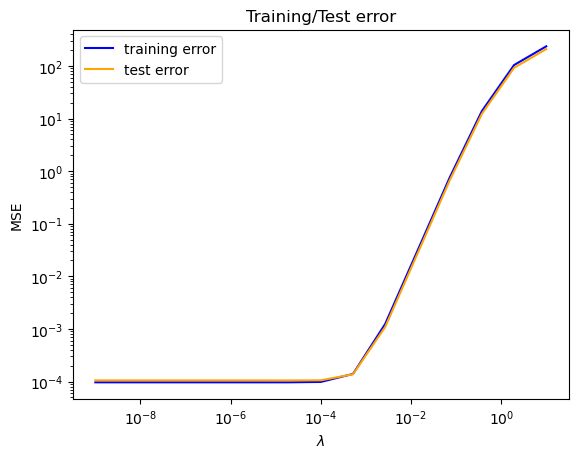

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
# The number of train samples
ntrain = 500
# The number of test samples
ntest = 100
# Dimension, feature or column
D = 2
# Lower Boundary
low_D = [-2] * D
# Upper Boundary
high_D = [2] * D
w_true = np.array([i for i in range(D)]).reshape(D, 1) + 10
noise_std = 0.01

# Data generation
# Generate training and test sets
# np.random.uniform(0, 10, 5) # 5 number generations in range[0, 10]
# array([ 1.9151945 ,  6.22108771,  4.37727739,  7.85358584,  7.79975808])
# In size of array(500, 2) 500 rows and 2 column, in range(-4,4) 
Xtr = np.random.uniform(low_D, high_D, size=(ntrain, D))
Ytr = np.dot(Xtr, w_true) + np.random.normal(0, noise_std, size=(ntrain, 1))
# np.dot = dot production
# np.random.normal(mean, standard deviation, size)
# mean is zero or central point as far as I remembered
# noise_std is deviation
# size=(ntrain, 1) -> an array with ntrain=100 rows and 1 column
# Ytr = function + noise
Xte = np.random.uniform(low_D, high_D, size=(ntest, D))
Yte = np.dot(Xte, w_true) + np.random.normal(0, noise_std, size=(ntest, 1))

# Return numbers spaced evenly on a log scale.
# Pay attention to log scale (more accessible and easier to use instead of
	# other scales)
# Parameters => start = -9, stop = 1, size = 15
lam_list = np.logspace(-9, 1, 15)
tr_err = []
te_err = []

# For each lambda (usually to explore the best choice)
for lam in lam_list:
    # Train RLS
    w = regularizedLSTrain(Xtr, Ytr, lam)
    
    # Compute predictions on training and test set
    Ytr_pred = regularizedLSTest(w, Xtr)
    Yte_pred = regularizedLSTest(w, Xte)
    
    # Compute training and test error and store them in tr_err and te_err
    train_err = calcError(Ytr_pred, Ytr)
    test_err = calcError(Yte_pred, Yte)
    
    tr_err.append(train_err)
    te_err.append(test_err)

# Plot training and test error
_, ax = plt.subplots()
ax.set_title("Training/Test error")
# x = lam_list, y = tr_err
ax.plot(lam_list, tr_err, '-', c="blue", label="training error")
# x = lam_list, y = te_err
ax.plot(lam_list, te_err, '-', c="orange", label="test error")
# the words written on or next to a picture, map, coin, etc., that explain
	# what it is about or what the symbols on it mean
ax.legend(loc="best")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
# Scale setting -> in logarithmic way
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

### Step 10: K-Fold Cross Validation for RLSStep 10

In [12]:
# Xtr = Training Set
# Ytr = True Traning Set
# KF = Number of folds or groups
# regpar_list = lambda list
# w is calcultable, lambda is given
# Now we are looking for the best lambda
def KFoldCVRLS(Xtr, Ytr, KF, regpar_list):
    if KF <= 1:
        raise Exception("Please supply a number of fold > 1")

    # Ensures that regpar_list is a numpy array
    regpar_list = np.array(regpar_list)
    num_regpar = regpar_list.size

    n_tot = Xtr.shape[0]
    n_val = int(n_tot // KF)

    # We want to compute 1 error for each `k` and each fold
		# A matrix with zero elements, num_regpar rows, and KF folds
    tr_errors = np.zeros((num_regpar, KF))
		# A matrix with zero elements, num_regpar rows, and KF folds
    val_errors = np.zeros((num_regpar, KF))
		
		# For each lambda division and calculation is accomplished
    for idx, regpar in enumerate(regpar_list):
				# >>> enm = enumerate([3, 5, 7, 9])
			  # >>> print(list(enm))
			  # [(0, 3), (1, 5), (2, 7), (3, 9)]	=> idx is the index and regpar is the
				# value	which is used by algorithm to get predictions for the test set
				# for each lambda	
		
        # `split_idx`: a list of arrays, each containing the validation indices
					# for 1 fold
				# Choose indexies randomly and consider as a fold or group
				# np.random.choice(5, 3) -> from 0 to 5 just three numbers are chosen randomly
        # array([0, 3, 4]) # random
        # Random Index
        # This code generates numbers by n_tot and to the number of n_tot
        # Array of random indexies with n_tot numbers 
        rand_idx = np.random.choice(n_tot, size=n_tot, replace=False)
				# >>> rand_idx = np.random.choice(10, size=10, replace=False)
				# >>> rand_idx
				# array([0, 5, 2, 1, 9, 7, 3, 8, 6, 4])				

				# The array of random indexies is divided by KF (folds or groups)
        split_idx = np.array_split(rand_idx, KF)
        for fold in range(KF):
            # Set the indices in boolean mask for all validation samples to `True`
            val_mask = np.zeros(n_tot, dtype=bool)
            val_mask[split_idx[fold]] = True

            # Use the boolean mask to split X, Y in training and validation part
            X = Xtr[~val_mask]
            Y = Ytr[~val_mask]
            X_val = Xtr[val_mask]
            Y_val = Ytr[val_mask]
            
            # Train a RLS model for a single fold, and the given value of `regpar`
						# To obtain w
						# regpar is obtained from for loop
            currW = regularizedLSTrain(X, Y, regpar)
            
            # Predicted y (traning) is calculated by w and X
            YpredTR = regularizedLSTest(currW, X)
						# Compute the training error of the RLS regression for the given value of regpar
            tr_errors[idx, fold] = calcError(YpredTR, Y)
            
						# Predicted y (test) is calcualted by w and X
            YpredVAL = regularizedLSTest(currW, X_val)
						# Compute the validation error of the RLS regression for the given value of regpar
            val_errors[idx, fold] = calcError(YpredVAL, Y_val)
            
    # Calculate error statistics along the repetitions
    tr_mean = np.mean(tr_errors, axis=1)
		# Compute the variance along the specified axis.
    tr_var = np.var(tr_errors, axis=1)
    val_mean = np.mean(val_errors, axis=1)
    val_var = np.var(val_errors, axis=1)
    
		# np.argmin() Returns the indices of the minimum values along an axis.
		# It was just like KNN algorithm to explore the best lambda 
    bestlam_idx = np.argmin(val_mean)
    bestlam = regpar_list[bestlam_idx]

    return bestlam, val_mean, val_var, tr_mean, tr_var

X: [[ 1.45118058e-01]
 [ 2.71072126e+00]
 [-1.68387138e+00]
 [ 2.63210984e+00]
 [-1.47247253e+00]
 [ 1.47834042e+00]
 [ 1.65035136e+00]
 [-2.18279338e+00]
 [-7.74255308e-01]
 [ 1.09872829e+00]
 [ 6.08724488e-01]
 [-1.00126005e+00]
 [ 1.97520664e+00]
 [-2.92659130e+00]
 [-2.56004789e+00]
 [ 2.17769967e+00]
 [-2.16261282e+00]
 [ 2.18337650e+00]
 [ 4.18605356e-02]
 [ 9.40758569e-01]
 [ 1.20397322e+00]
 [-1.55888920e-01]
 [-1.71924352e+00]
 [ 5.54279722e-01]
 [-2.76333393e+00]
 [ 1.50557110e+00]
 [-2.43523257e-01]
 [-2.27534740e+00]
 [-2.18022565e+00]
 [-2.71444906e+00]
 [-1.60648512e+00]
 [-2.53633872e+00]
 [ 2.16601692e+00]
 [ 1.81492014e+00]
 [ 2.90292720e+00]
 [ 5.17235675e-01]
 [-9.54452935e-01]
 [-2.00993159e+00]
 [-2.18602932e+00]
 [ 1.38134116e-01]
 [ 1.23897088e+00]
 [-1.23875111e+00]
 [-4.30513195e-01]
 [-2.25800939e+00]
 [-1.73651691e+00]
 [-4.97592394e-02]
 [ 9.78341557e-01]
 [ 1.49349324e+00]
 [ 7.11911812e-01]
 [ 1.13382708e+00]
 [-1.10782062e-02]
 [-2.30636764e+00]
 [-2.8349

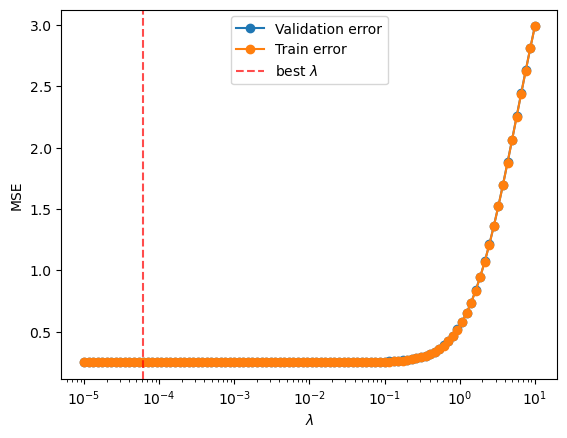

In [13]:
# Set parameters
# The number of samples
n = 1000
# Dimension, feature or column
D = 1
# Noise
sigma_noise = 0.5
truew = np.random.randn(D, 1)
# truew = np.random.randn(1, 1)
# >>> truew
# array([[0.59606148]])

# Return numbers spaced evenly on a log scale -> log scale
reg_pars = np.logspace(-5, 1, 100)
# reg_pars
# array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
#       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
#  			...])
KF = 5

low_D = [-3] * D
high_D = [3] * D

# Generate training set
# To generate linear regression data
Xtr, Ytr = linearRegrFunction(n, D, low_D, high_D, truew, sigma_noise)

# Compute best lambda
# return bestlam, val_mean, val_var, tr_mean, tr_var
# return bestlam, Val_mean=vm, Val_var=vs, tr_mean=Tm, tr_var=Ts
bestlam, Vm, Vs, Tm, Ts = KFoldCVRLS(Xtr, Ytr, KF, reg_pars)

# Plot training and validation error
_, ax = plt.subplots()
# x = reg_pars, y = Vm (val_mean)
ax.plot(reg_pars, Vm, '-o', label="Validation error")
# x = reg_pars, y = tm (tr_mean)
ax.plot(reg_pars, Tm, '-o', label="Train error")
# ax.axvline = Add a vertical line across the Axes.
ax.axvline(bestlam, linestyle="--", c="red", alpha=0.7, label="best $\lambda$")
# Scale spcification
ax.set_xscale("log")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
ax.legend(loc="best")

In [14]:
# Set parameters
# The number of samples
n = 1000
# Dimension, feature or column
D = 1
# Noise
sigma_noise = 0.5
truew = np.random.randn(D, 1)
# truew = np.random.randn(1, 1)
# >>> truew
# array([[0.59606148]])

# Return numbers spaced evenly on a log scale.
# Pay attention to log scale (more accessible and easier to use instead of
	# other scales)
# Parameters => start = -9, stop = 1, size = 15
reg_pars = np.logspace(-5, 1, 100)
# reg_pars
# array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
	# 1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,..., ])
KF = 5

low_D = [-3] * D
high_D = [3] * D

# Generate training set
Xtr, Ytr = linearRegrFunction(n, D, low_D, high_D, truew, sigma_noise)

# Compute best lambda
bestlam, Vm, Vs, Tm, Ts = KFoldCVRLS(Xtr, Ytr, KF, reg_pars)

# Generate test set
Xte, Yte = linearRegrFunction(200, D, low_D, high_D, truew, sigma_noise)

print("[--] best lambda found: {}".format(bestlam))

# Train the model on the full training set with the best lambda
w_best = regularizedLSTrain(Xtr, Ytr, bestlam)

# Compute predictions on the test set
Ypred_best = regularizedLSTest(w_best, Xte)

# Compute test error
test_err = calcError(Ypred_best, Yte)

print("[--] Test error: {}".format(test_err))

X: [[-2.94132286e+00]
 [-7.26648657e-01]
 [ 2.31176904e+00]
 [ 2.53112224e+00]
 [-2.67234923e+00]
 [ 9.73454641e-01]
 [-1.92747028e+00]
 [-2.79898337e+00]
 [ 2.12790847e+00]
 [ 1.23246320e-01]
 [ 1.63461043e+00]
 [ 1.15682687e+00]
 [ 2.55226542e+00]
 [ 2.03846876e+00]
 [-3.95287335e-02]
 [ 7.25642395e-01]
 [ 2.81378252e-01]
 [-1.24632715e-01]
 [ 1.87269385e-01]
 [-1.35461943e+00]
 [ 1.42480461e+00]
 [-2.65169322e+00]
 [ 5.57698192e-01]
 [-1.35961538e+00]
 [-2.50806355e+00]
 [ 1.65089589e+00]
 [-1.27888700e+00]
 [-4.66202112e-01]
 [-2.27179005e+00]
 [-8.87537006e-01]
 [-2.59672239e+00]
 [-2.06016540e+00]
 [-2.33371009e+00]
 [-2.30848237e+00]
 [ 1.23004913e+00]
 [-1.77369848e+00]
 [ 1.67787088e+00]
 [ 2.03757388e+00]
 [-2.54553024e+00]
 [-1.26456387e+00]
 [-2.64878832e+00]
 [-4.69092072e-01]
 [ 2.60311465e+00]
 [-2.94014938e+00]
 [-1.23444036e+00]
 [ 4.59683740e-01]
 [ 1.34336956e+00]
 [ 5.95941809e-01]
 [-2.70552214e-02]
 [-1.61683566e+00]
 [ 1.18575916e+00]
 [-2.45007895e+00]
 [-1.6892